In [1]:
# comparing RT latency on 2 different kernel versions
# bone 20: 4.14.29-ti-rt-r40  -  installed using apt-get method from rcnelson repo
# bone 21: 4.14.71-ti-rt-r77  -  custom build

# cyclictest commands:
# round2:
#     sudo ./cyclictest -m -n -p80 -i1000 -q -h300 > <output file>
# round3:
#     sudo ./cyclictest -m -n -p80 -i10000 -q -h300 > <output file>

# background stress:
#
# 1)
# from the linux test project:
# ltp/testcases/realtime/
# >> while true; do ./run.sh -t all -l 1 ; done
#
# 2)
# from the rt-test suite
# >> while true; do dd if=/dev/zero of=/dev/null bs=1024000 count=1024; done & 
# >> while true; do pkill hackbench; sleep 5; done&
# >> while true; do  /home/debian/test/rt-tests/hackbench 20; done &
# >> while true; do ping -l 100000 -q -s 10 -f localhost ; done &
# >> while true; do du / > /dev/null  ; done & 



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from matplotlib import gridspec
%matplotlib notebook

In [3]:
def filter_pos(num,delay):
    mask = num > 0
    num = num[mask]
    num /=sum(num)
    delay = delay[mask]
    return (num,delay)

def load_data(r):
    data = dict();
    
    fname = r['path20'];
    T = np.genfromtxt(fname, skip_header = 2, skip_footer=7, delimiter=' ')
    d = T[0:,0];
    n =  T[0:,1];
    (data['num20'],data['delay20']) = filter_pos(n,d);
    
    fname = r['path21'];
    T = np.genfromtxt(fname, skip_header = 2, skip_footer=7, delimiter=' ')
    d = T[0:,0];
    n =  T[0:,1];
    (data['num21'],data['delay21'])  = filter_pos(n,d);
    
    data['desc'] = r['desc'];
    return data;

In [4]:
r1 = {'path20': "./RT_kernel_compare/bone20.log",  
      'path21': "./RT_kernel_compare/bone21.log", 
      'desc': "basic meas"};

r2 = {'path20': "./RT_kernel_compare/round2/bone20.log",  
      'path21': "./RT_kernel_compare/round2/bone21.log", 
      'desc': "period:1000usec"};

r3 = {'path20': "./RT_kernel_compare/round3/bone20.log",  
      'path21': "./RT_kernel_compare/round3/bone21.log", 
      'desc': "period:10000usec"};

r4 = {'path20': "./RT_kernel_compare/round4/bone20.log",  
      'path21': "./RT_kernel_compare/round4/bone21.log", 
      'desc': "period:10000usec"};

round_info = [r1,r2,r3,r4];


In [5]:
round_data = map(lambda r: load_data(r), round_info)

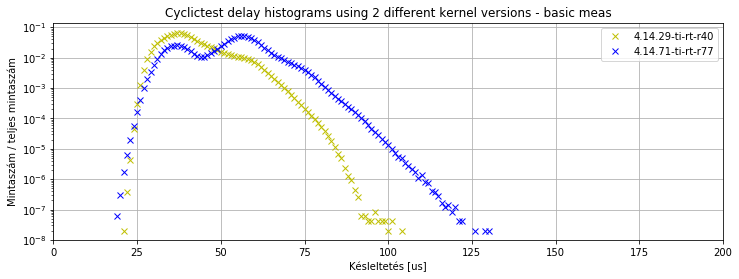

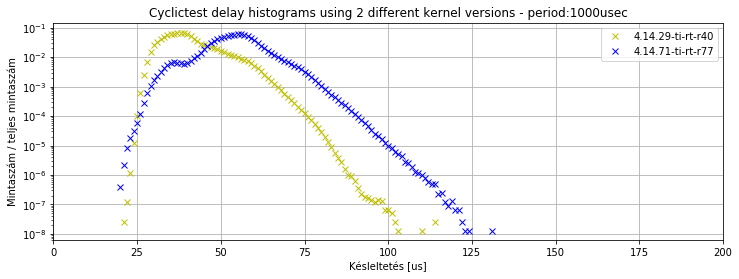

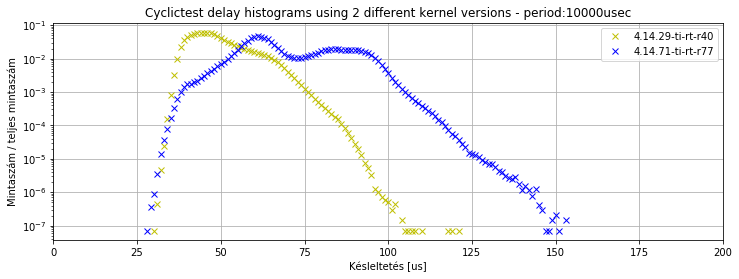

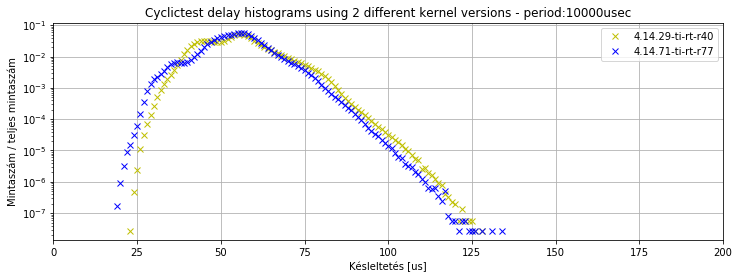

In [6]:
for data in round_data:
    figure(figsize=(12,4))

    title(u'Cyclictest delay histograms using 2 different kernel versions - %s' % data['desc'])

    semilogy(data['delay20'], data['num20'], 'x', Color='y', label='4.14.29-ti-rt-r40')
    semilogy(data['delay21'], data['num21'], 'x', Color='b' , label='4.14.71-ti-rt-r77')

    xlabel(u'Késleltetés [us]')
    ylabel(u'Mintaszám / teljes mintaszám')
    legend()
    grid()
    xlim([0,200])
    show()